# Instalar dependencias
---

In [19]:
!( [ -d computer-vision-cards ] && cd computer-vision-cards/ && git pull origin main ) || git clone https://github.com/amaranto/computer-vision-cards.git

From https://github.com/amaranto/computer-vision-cards
 * branch            main       -> FETCH_HEAD
Already up to date.


In [19]:
! pip install unicode unidecode fiftyone

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 25.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 15.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 50.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 103.1 MB/s eta 0:00:00
 

# Dataset
---

<p> Se utilizo gdown y un script de bash para descargar todos los datasets subidos al formulario solicitado del ejecicio 1 y se unificaron en una sola carpeta, la cual fue subido a mi drive personal.</p>
<p> Luego se desarrollo un script de python, el cual sigue los siguientes pasos :<p>


1.   Recorre todos los archivos de etiquetas tomando como base el nombre del archivo sin la extension .txt, renombra el nombre de los archivos .txt e imagenes que contengan acentos o caracteres extranos del dataset original.
2.   Si las etiquetas estan en formato polygon entonces las transforma a `x1,y1,x2,y2` y redimensiona las coordenadas a su tamano original.
3.   Luego utiliza cv2 para generar el bbox que se ajuste mas a las coordenadas definidas en el archivo de etiqueta.
4.   No se genera una carpeta label_errors porque se utilizan y aprovechan todas las cartas del dataset.
5.   Guarda imagenes con los bboxes generados sobre las mismas para posterior verificacion manual en la carpeta `dataset/output/bbox_check_folder/img`
6.   Convierte las nuevas coordenadas a formato yolo con bbox y guarda los archivos en `dataset/output/bbox_check_folder/labels`
7.   Copia los nuevos archivos de etiquetas generados desde `dataset/output/bbox_check_folder/labels` al dataset original
8.   Genera el datset en formato yolo en `.datasets/yolo-format`, generando la carpeta de validacion y training respectivamente, utilizando los archivos del dataset original y los que fueron corregidos previamente.
9.   Algunos datasets subidos por los alumnos tenian mas 48 clases (el mio incluido), esto debido a errores de tipeo al momento de etiquetar el dataset, pero para aprovechar estas imagenes se generaron dos clases extras S (skip) y SS (skip'), las cuales luego van a ser ignoradas como 8,9 y J a la hora de evaluar el envido. Como se ve en el grafico de distribucion de instancias de clases, y no afectaran demasiado a las metricas a la hora de entrenarl el modelo.
10.  Se detecta que los archivos de `51705_micaela_pozzo_.*` estan mal etiquetados, los archivos `*.txt` no estan relacionados con las imagenes como corresponden , por lo que se proceden a borrar manualmente con `rm -f ./computer-vision-cards/datasets/yolo-format/{images,labels}/{train,val}/51705_micaela_pozzo_** `.
11. El 20% de las imagenes se dejan para validacion.
</p>


In [5]:
!cd computer-vision-cards/ &&  python datasetHandler.py

Downloading...
From (original): https://drive.google.com/uc?id=1u7eRhAuarRWJNNMTsdRIh18fBL3Lhlka
From (redirected): https://drive.google.com/uc?id=1u7eRhAuarRWJNNMTsdRIh18fBL3Lhlka&confirm=t&uuid=8638b898-468c-4a70-bea8-d6b0886d7970
To: /content/computer-vision-cards/datasets/1u7eRhAuarRWJNNMTsdRIh18fBL3Lhlka.zip
100% 4.52G/4.52G [00:50<00:00, 90.4MB/s]
Found 1 folders but working on ds-todas-las-cartas
Processing ./datasets/dowloaded//ds-todas-las-cartas/aba2720d35f5ea68fae3f1edca09510b.png...
Processing ./datasets/dowloaded//ds-todas-las-cartas/71846_Brisa_Menescaldi_29.png...
Processing ./datasets/dowloaded//ds-todas-las-cartas/26f38499ae0ac746a12238844114ee2b.png...
Processing ./datasets/dowloaded//ds-todas-las-cartas/71846_Brisa_Menescaldi_06.png...
Processing ./datasets/dowloaded//ds-todas-las-cartas/d429816_cesar_donnarumma_01.png...
Processing ./datasets/dowloaded//ds-todas-las-cartas/F37605_florencia_fernandez_03.png...
Processing ./datasets/dowloaded//ds-todas-las-cartas/R-45

In [9]:
!rm -f ./computer-vision-cards/datasets/yolo-format/{images,labels}/{train,val}/51705_micaela_pozzo_*

# Augmentation
---
Se utiliza albumentation para aumentar el dataset generado, se eligio por la simplicidad para aplicar y generar diferentes tecnicas de aumentacion y la buena documentacion que posee la herramienta. 

Se utilizaron las clases de rotaciones, aumento y variacion de brillo y contraste, redimension y perspectiva sobre el dataset generado.
No se utilizaron el resto de clases como mosaico, corte y copy_paste porque se van a aplicar al activar la aumentacion del entrenamiento con YOLO.

Se aplico la aumentacion no solo para tener mas datos de entrenamiento y validacion, sino tambien para entrenar al modelo desde distintas perspectivas y distancias que podrian tener las fotos al momento de ser tomadas.

Las imagenes son generadas sobre el dataset original, al igual que sus archivos de etiquetas, pero con el sufijo `_augmented_<id>`.

Algo importante a mencionar, es que al utilizar PIL, las imagenes tomadas con el celular en forma horizontal, invierten sus coordenadas x,y, por lo que se utiliza la opcion `ImageOps.exif_transpose(orig)`.

Guardamos aparte las imagenes generadas con los bboxes para verficacion en la carpeta `./datasets/augmentation-check` .


In [11]:
!cd ./computer-vision-cards && python datasetAugmenter.py

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.12 (you have 1.4.11). Upgrade using: pip install --upgrade albumentations
--------------------------------------------------
Image: ./datasets/yolo-format/images/train/37524_augusto_farias_20.jpg 0/745
/usr/local/lib/python3.10/dist-packages/albumentations/core/composition.py:156: UserWarning: Got processor for bboxes, but no transform to process it.
  self._set_keys()
Image: ./datasets/yolo-format/images/train/37524_augusto_farias_20.jpg Destiny:./datasets/yolo-format/images/train//37524_augusto_farias_20_augmented_0.png Label: ./datasets/yolo-format/labels/train//37524_augusto_farias_20_augmented_0.txt Aug: 0/8
Image: ./datasets/yolo-format/images/train/37524_augusto_farias_20.jpg Destiny:./datasets/yolo-format/images/train//37524_augusto_farias_20_augmented_1.png Label: ./datasets/yolo-format/labels/train//37524_augusto_farias_20_augmented_1.txt Aug: 1/8
Image: ./datasets/yolo-format/images/train/375

# Distribucion de clases
---
Como se muestra acontinuacion, si bien aunque la distribucion de clases no es exacta sigue siendo muy buena y proporcionalmente equilibrada, por lo cual las metricas del modelo tales como recall, accuracy y las funciones de perdidas, no deberian verse afectadas a la hora del entrenamiento ni generar bias hacia una o mas clases especificas.

Tambien, se ve que hay menos clases para los 8 y 9, lo cual es esperado y un numero minoritario de instancias de clases mal etiquetadas.

Se observa que los bouding boxes tienen tendencia a concentrarse en el centro de las imagenes y sus alrededores, tambien que la proporcion de alto y ancho de las cajas con respecto a las imagenes es menor al 40% en su gran mayoria, por lo que nos da el indicio que mayormente las fotos de las cartas fueron tomadas a una distancia moderada y que la mayoria de las fotos contara con gran cantidad de background o varias cartas por fotos.


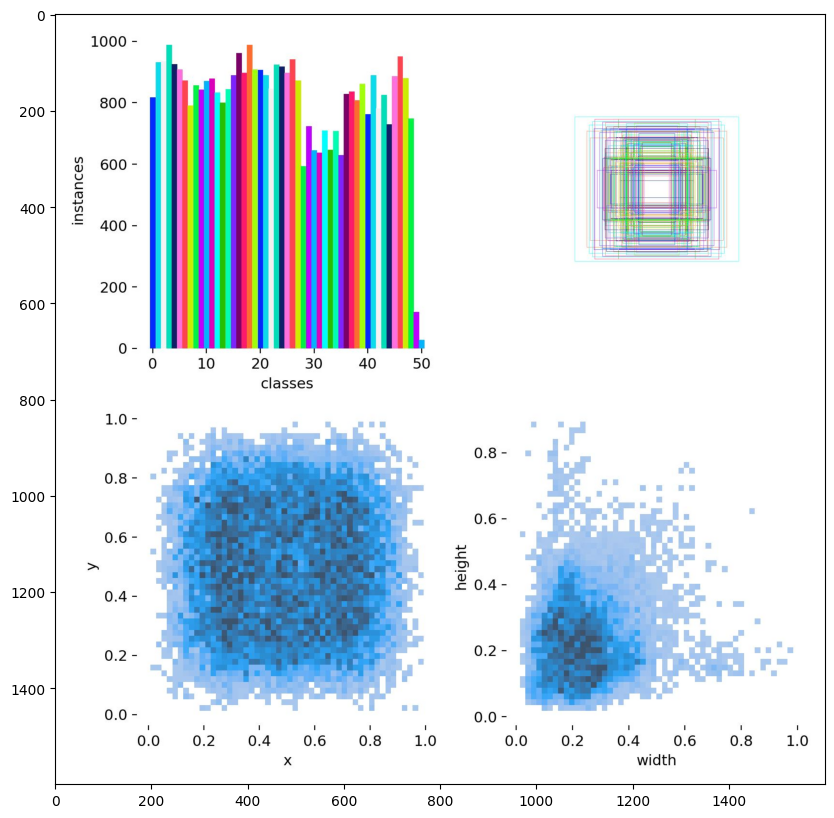

In [16]:
import matplotlib.pyplot as plt

dist_labels = plt.imread("doc/labels.jpg")
plt.figure(figsize=(20,10))
plt.imshow(dist_labels)

# Visualizacion del dataset Pre-entrenamiento
---
Se Visualiza el dataset generado

In [23]:
!cd $HOME/computer-vision-cards && python datasetViewer.py

 100% |█████| 1411/1411 [3.9s elapsed, 0s remaining, 389.7 samples/s]      
Dataset length: 1411
 100% |█████████| 10/10 [5.2s elapsed, 0s remaining, 1.9 samples/s]      


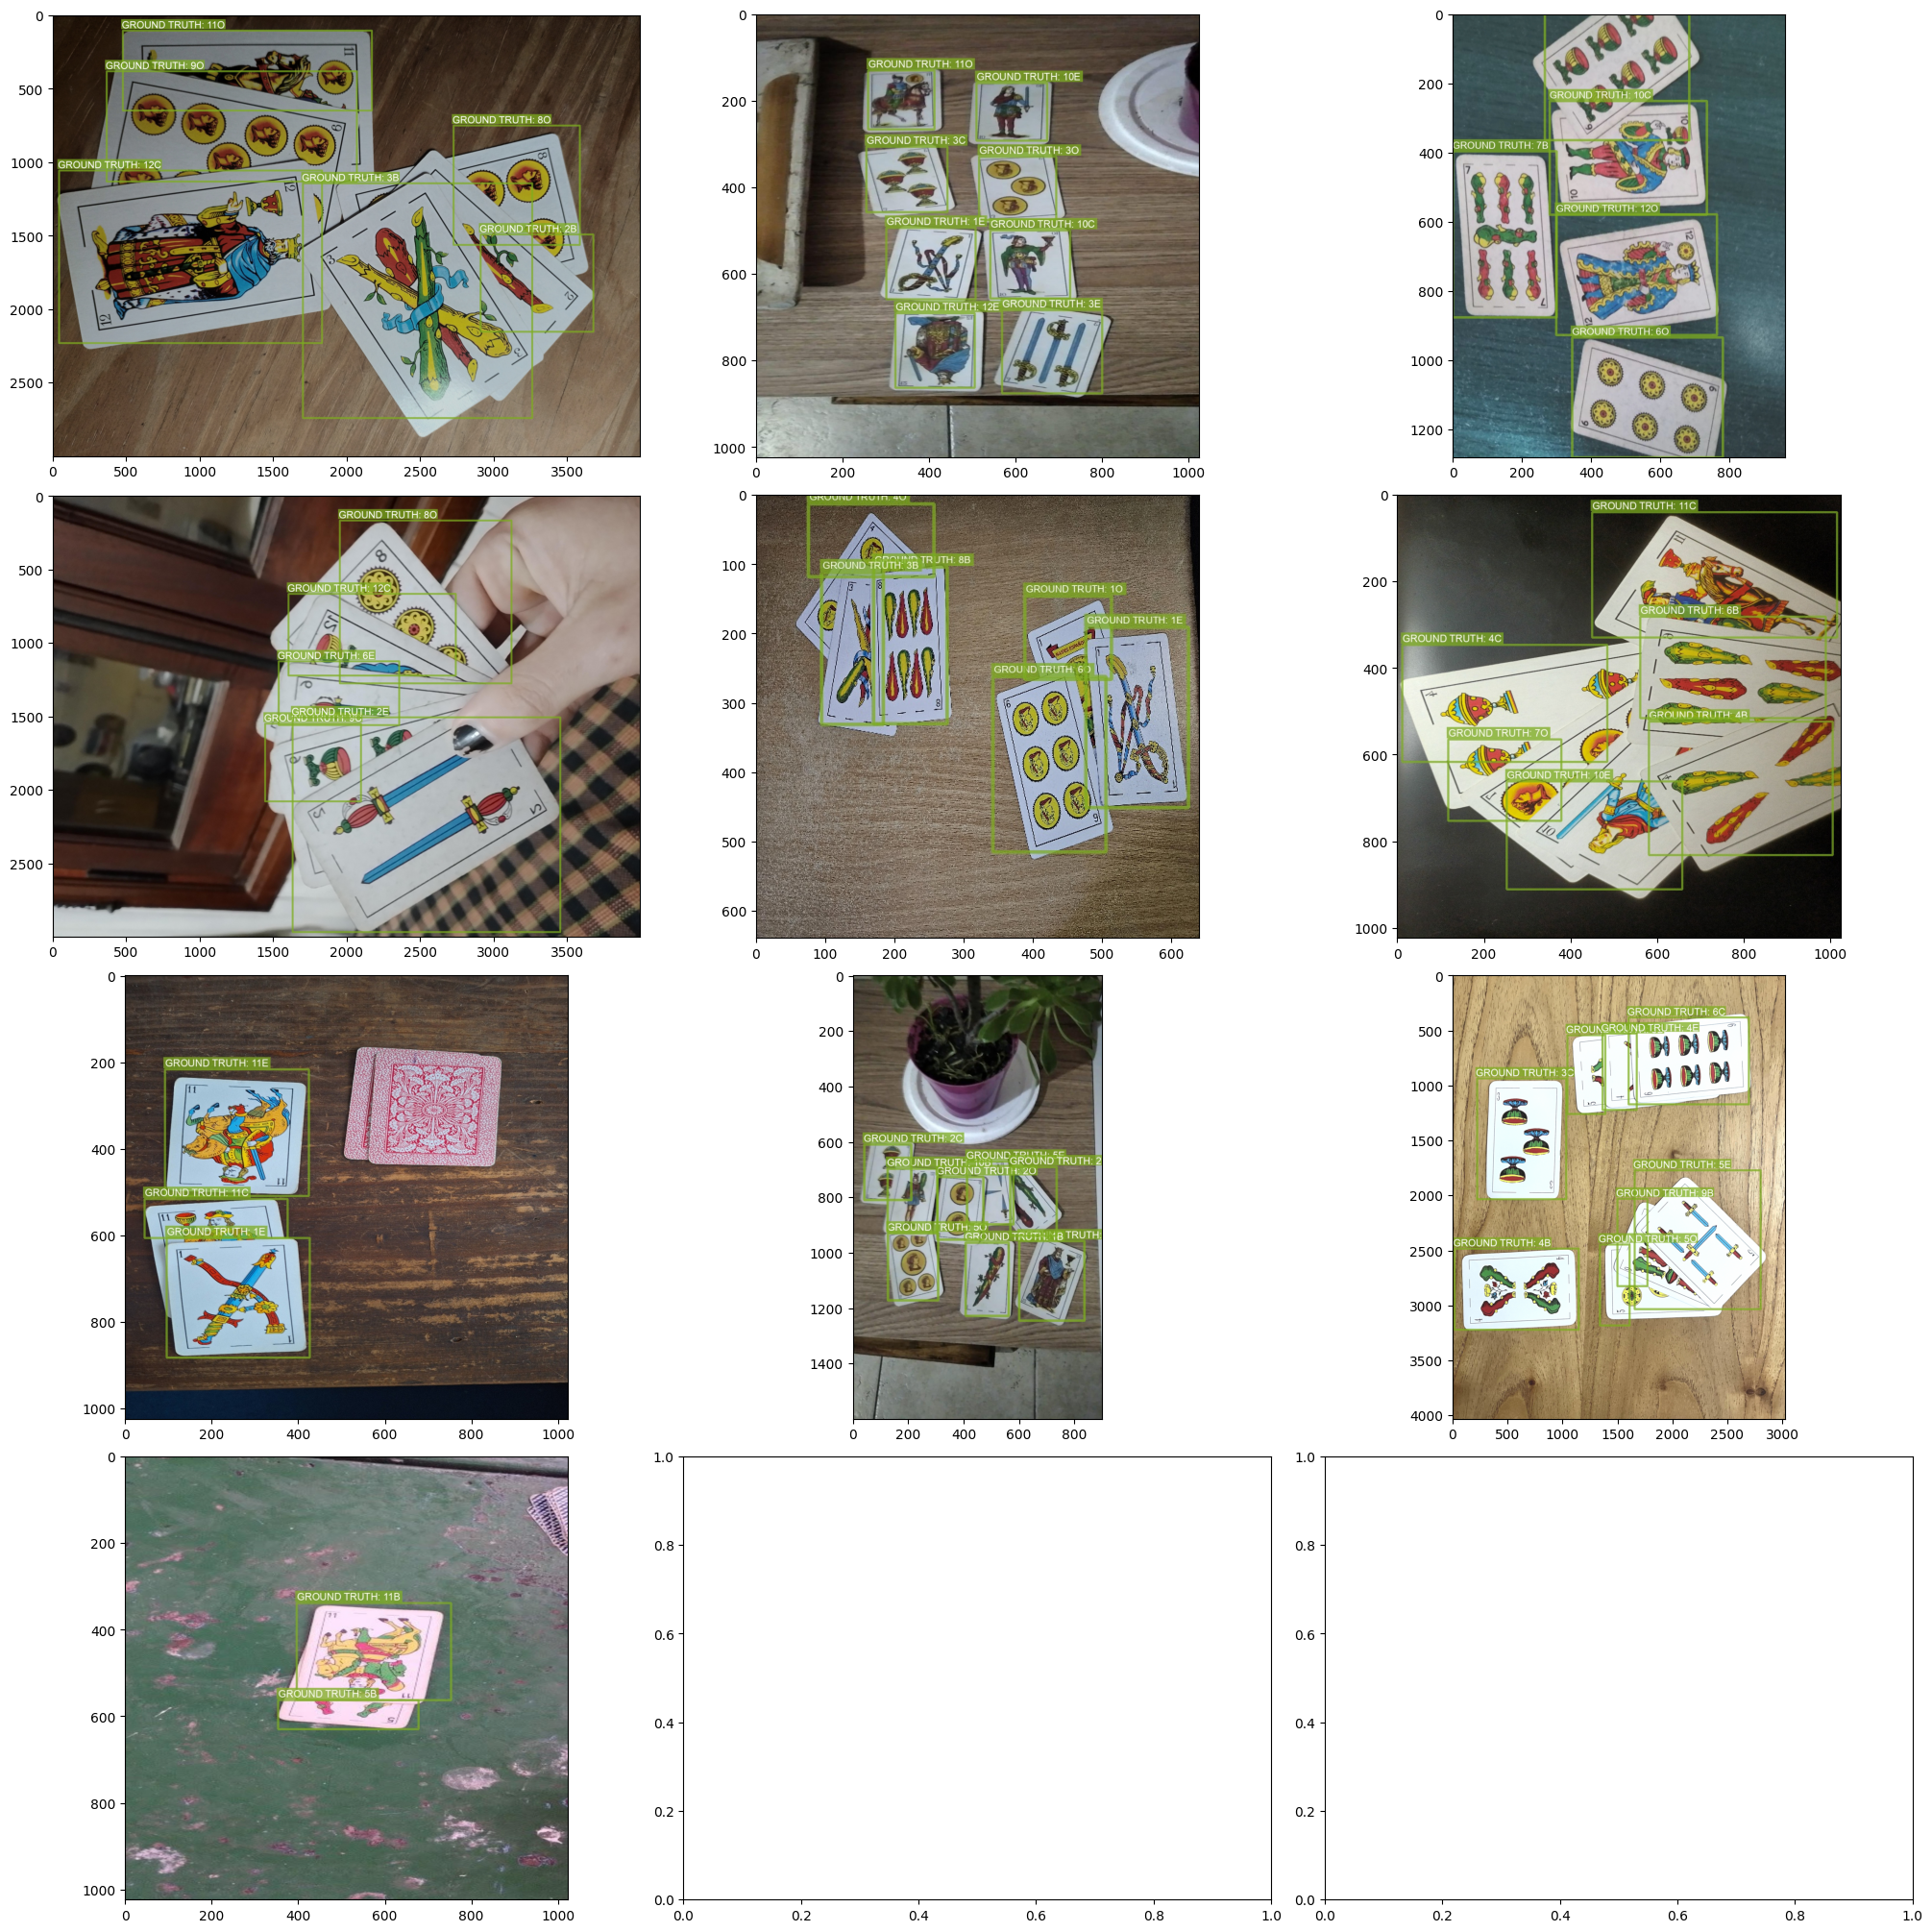

In [31]:
import glob
from config import FIFTY_ONE_DATASET

pictures = glob.glob(f"{FIFTY_ONE_DATASET}/*")

cols = 3
rows = (len(pictures)/cols) + (len(pictures)%cols)
rows = int(rows)
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(20, 20),layout="constrained")

n=0
for i in range(0,rows):
    for j in range(0,cols):
        if n >= len(pictures):
            break
        dist_labels = plt.imread(pictures[n])
        axs[i][j].imshow(dist_labels)
        n+=1
        
plt.show()

# Subimos el dataset generado y verificado a Google Drive
---

# Entrenamiento
---

Utilizamos YOLOv8 en su version m para Object Detection: `model=YOLO("yolov8m.yaml")`

*  Se utiliza GPU si esta disponible : `device=device`
*  Se utiliza hasta el 80% de la memoria para generar batches de entrenamiento: `batch=0.8`
*  Se espera hasta 20 epocas y si no hay mejoras se termina el entrenamiento : `patience=20`
* Se habilita para guardar los pesos de entrenamiento : `save=True`
* Se guarda cada 10 epocas: `save_period=10`
* No se resume para el primer entrenamiento : `resume=False`
* Se habilita la validaccion : `val=True`
* Se habilita la generacion de imagenes para graficar metricas y entender mejor el funionamiento y performance del modelo : `plots=True`
* Se utiliza resize de las imagenes para el entrenamiento de 640x640. Lo ideal seria aumentarlo por lo menos a 1024, pero debido la falta de recursos de hardware no fue posible, se duplica el uso de memoria:  `imgsz = 640`
* Se entrena 100 epocas `epochs=100`
* Se aumenta el peso de la clasificacion en la funcion de perdida para darle mas importancia a la deteccion de la clase correcta `cls=0.8`
* Se habilita la aumentaion de datos al entrenar : `augment=True`
* Se deshabilitan para la aumentacion : `shear` ya que no necesitamos que se corten las fotos porque hay bastante oclusion de las mismas en el dataset de etrenamiento y `bgr` porque el color para la deteccion del palo es importante.
* Se deja por defecto desactivar la opcion de mosaico en los ultimas 10 epocas, para poder estabilizar el entrenamiento y ver mejor el comportamiento de las metricas al final del entrenamiento.



In [6]:
![ -d $HOME/computer-vision-cards/datasets/yolo-format ] || ( mkdir -p ./computer-vision-cards/datasets && cd ./computer-vision-cards/datasets &&  gdown --folder "https://drive.google.com/drive/folders/1ddGMw-1mH15e0dYKH11aR1zAGSCUNSZE" --remaining-ok )

In [15]:
!cd $HOME/computer-vision-cards && python training.py 2>&1 

New https://pypi.org/project/ultralytics/8.2.67 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.62 🚀 Python-3.11.2 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 14918MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=./datasets/yolo-format/dataset.yaml, epochs=100, time=None, patience=20, batch=0.9, imgsz=640, save=True, save_period=10, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fals

In [33]:
import glob
import torch
import os
from ultralytics import YOLO

from config import YOLO_DATASET, YOLO_MODEL, YOLO_PRED_OUTPUT

os.makedirs(YOLO_PRED_OUTPUT, exist_ok=True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = YOLO(YOLO_MODEL)
#results = model.val(data=YOLO_DATASET)

pictures = glob.glob("./data/eval/images/val/*")

for picture in pictures:
    filename = picture.split("/")[-1]
    results = model(picture)  
    for result in results:
        boxes = result.boxes
        masks = result.masks
        keypoints = result.keypoints
        probs = result.probs
        obb = result.obb
        result.save(filename=f"./datasets/predictions/{filename}")
        




image 1/1 /home/earevalo/computer-vision-cards/data/eval/images/val/IMG_20240630_174115784.jpg: 640x512 1 8C, 1 9C, 1 9E, 28.9ms
Speed: 3.3ms preprocess, 28.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 /home/earevalo/computer-vision-cards/data/eval/images/val/IMG_20240630_174005265.jpg: 640x512 1 1O, 28.2ms
Speed: 3.3ms preprocess, 28.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 /home/earevalo/computer-vision-cards/data/eval/images/val/IMG_20240630_174133804_HDR.jpg: 640x512 1 3E, 1 4E, 28.2ms
Speed: 3.3ms preprocess, 28.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 /home/earevalo/computer-vision-cards/data/eval/images/val/IMG_20240630_174302382_HDR.jpg: 640x512 1 1E, 1 6C, 28.2ms
Speed: 3.3ms preprocess, 28.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 /home/earevalo/computer-vision-cards/data/eval/images/val/IMG_20240630_173954348.jpg: 640x512 1 1

In [ ]:
pictures = glob.glob("./datasets/predictions/*")

cols = 4
rows = (len(pictures)/cols) + (len(pictures)%cols)
rows = int(rows)
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(20, 20),layout="constrained")

n=0
for i in range(0,rows):
    for j in range(0,cols):
        if n >= len(pictures):
            break
        dist_labels = plt.imread(pictures[n])
        axs[i][j].imshow(dist_labels)
        n+=1
        
plt.show()

# Metricas
---

## Matriz de Confusion
---

<p>Como se muestra a continuacion al modelo le cuesta clasificar mayormente entre las distintas cartas negras (10,11 y 12) y tambien es mas propenso a confundir estas cartas con los anchos (1). Esto tiene sentido porque tanto como los anchos y las negras tienen figuras grandes y parecidas entre los distintos palos.</p>

<p>Tambien se puede ver que tiene una tendencia a confundir los mismos numeros de distintos palos, lo cual tambien tiene sentido ya que comparten detalles en comun. </p>

<p>A pesar de esto, el modelo logra detectar y clasificar con bastante prediccion las distintas cartas. </p>

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
dist_labels = plt.imread("doc/metrics/confusion_matrix.png")
plt.imshow(dist_labels)

## Precision, F1 y Recall
---
<p> Como se puede ver acontinuacion el modelo se desempana bastante bien para la clasifi</p>

In [ ]:
metrics = ["doc/metrics/F1_curve.png", "doc/metrics/P_curve.png", "doc/metrics/PR_curve.png", "doc/metrics/R_curve.png"]
cols = 2
rows = (len(metrics)/cols) + (len(metrics)%cols)
rows = int(rows)
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(20, 10),layout="constrained")

n=0
for i in range(cols):
    for j in range(rows):
        dist_labels = plt.imread(metrics[n])
        axs[i][j].imshow(dist_labels)
        n+=1
        
plt.show()

# Resultados
---

In [ ]:
plt.figure(figsize=(10,5))
results_metrics = plt.imread("doc/metrics/results.png")
plt.imshow(results_metrics)